In [18]:
import numpy as np
import geopandas as geopd
from geopandas.tools import sjoin
from matplotlib import pyplot as plt
import pandas as pd
from shapely.geometry import Point
import os

In [5]:
dept_num = '37-00027'
raw_data_dir = os.path.join(os.getcwd().replace("/notebooks", ""), "data", "raw")
dept_dir = os.path.join(raw_data_dir, "Dept_{}".format(dept_num))

acs_dir = os.path.join(dept_dir, "{}_ACS_data".format(dept_num))
shapefiles_dir = os.path.join(dept_dir, "{}_Shapefiles".format(dept_num))
shapefile_name = [file for file in os.listdir(shapefiles_dir) if '.shp' in file][0]
shapefile_path = os.path.join(shapefiles_dir, shapefile_name)
shapefile_df = geopd.read_file(shapefile_path)

crime_csv = [file for file in os.listdir(dept_dir) if 'prepped.csv' in file][0]
crime_df = pd.read_csv(os.path.join(dept_dir, crime_csv), skiprows=1)

census_shapefile_dir = os.path.join(dept_dir, "cb_2017_48_tract_500k")
census_shapefile_name = [file for file in os.listdir(census_shapefile_dir) if file[-4:] == '.shp'][0]
census_shapefile_path = os.path.join(census_shapefile_dir, census_shapefile_name)
census_shapefile_df = geopd.read_file(census_shapefile_path)

shapefile_df.head()

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,"POLYGON ((3160030.801874995 10110945.26125, 31..."
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((3117569.753749996 10072205.20874999,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,"POLYGON ((3117394.076875001 10072195.676875, 3..."
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((3138058.366874993 10093095.421875, 3..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,"POLYGON ((3132516.318124995 10096385.60124999,..."


In [12]:
NAD1983 = 'PROJCS["NAD_1983_StatePlane_Texas_Central_FIPS_4203_Feet",GEOGCS["GCS_North_American_1983",DATUM["North_American_Datum_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["False_Easting",2296583.333333333],PARAMETER["False_Northing",9842499.999999998],PARAMETER["Central_Meridian",-100.3333333333333],PARAMETER["Standard_Parallel_1",30.11666666666667],PARAMETER["Standard_Parallel_2",31.88333333333333],PARAMETER["Latitude_Of_Origin",29.66666666666667],UNIT["Foot_US",0.30480060960121924],AUTHORITY["EPSG","102739"]]'

os.listdir(shapefiles_dir)
with open(os.path.join(shapefiles_dir, 'APD_DIST.prj'), 'w') as outfile:
    outfile.write(NAD1983)

In [13]:
shapefile_df.to_file(filename=shapefile_path, driver='ESRI Shapefile', crs_wkt=NAD1983)
shapefile_df_w_prj = geopd.read_file(shapefile_path)
shapefile_df_w_prj.crs
shapefile_df_w_prj = shapefile_df_w_prj.to_crs(epsg=4326)
shapefile_df_w_prj.crs

{'init': 'epsg:4326', 'no_defs': True}

In [14]:
shapefile_df_w_prj.head()

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,POLYGON ((-97.59489290692989 30.37553595219777...
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((-97.73238075061246 30.2718484348228,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,POLYGON ((-97.73293781244578 30.27183352500001...
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,POLYGON ((-97.66590904315412 30.32793819394199...
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,POLYGON ((-97.68322191035148 30.33734648658404...


In [15]:
crime_df.head()

,RIN,Primary Key,Date Occurred,Area Command,Nature of Contact,Reason Desc,Master Subject ID,Subject Sex,Race,Subject Role,...,Officer Organization Desc,Officer Yrs of Service,X-Coordinate,Y-Coordinate,City Council District,Geolocation,City,State,Latitude,Longitude
0,156701,2015541517,2/24/2015,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,NaN,...,CRIMINAL INTERDICTION / K9,3,3100341,10030899,5.0,9900 BLOCK S IH 35 SB,Austin,TX,NaN,NaN
1,161046,20151510003,5/31/2015,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,5,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
2,161381,20151510003,5/31/2015,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,7,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
3,142588,2014111929,1/11/2014,HE,TRAFFIC STOP,NECESSARY TO DEFEND REPORTING OFFICER,198377769: 2014111929,M,Black,SUSPECT,...,HENRY 700 REG III PATROL,4,3117503,10057313,NaN,BURTON DR / E OLTORF ST,Austin,TX,NaN,NaN
4,162084,20151720001,6/21/2015,GE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,459030448: 20151720001,M,Black,NaN,...,GEORGE 400 REG I PATROL,3,3116713,10067447,3.0,SAN MARCOS ST / SPENCE ST,Austin,TX,NaN,NaN


In [16]:
# will want to geocode missing lat/long, but will drop them here
latlon_exists_index = crime_df[['Latitude','Longitude']].dropna().index
crime_df = crime_df.iloc[latlon_exists_index].reset_index(drop=True)
crime_df[["Latitude", "Longitude"]] = crime_df[["Latitude", "Longitude"]].astype(float)

In [19]:
crime_df['geometry'] = crime_df.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
crime_gdf = geopd.GeoDataFrame(crime_df, geometry='geometry')
crime_gdf.crs = {'init' :'epsg:4326'}
crime_gdf.head()

,RIN,Primary Key,Date Occurred,Area Command,Nature of Contact,Reason Desc,Master Subject ID,Subject Sex,Race,Subject Role,...,Officer Yrs of Service,X-Coordinate,Y-Coordinate,City Council District,Geolocation,City,State,Latitude,Longitude,geometry
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,4,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669)
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,8,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.74209599999999 30.19693)
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,10,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346)
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,2,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201)
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,6,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555)


In [20]:
## using chris' manual projection, will want to find a way to automate this process
#shapefile_df.crs = {'init' :'esri:102739'}
#shapefile_df = shapefile_df.to_crs(epsg=4326)
#shapefile_df

In [21]:
shapefile_df_w_prj.head()

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,POLYGON ((-97.59489290692989 30.37553595219777...
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((-97.73238075061246 30.2718484348228,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,POLYGON ((-97.73293781244578 30.27183352500001...
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,POLYGON ((-97.66590904315412 30.32793819394199...
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,POLYGON ((-97.68322191035148 30.33734648658404...


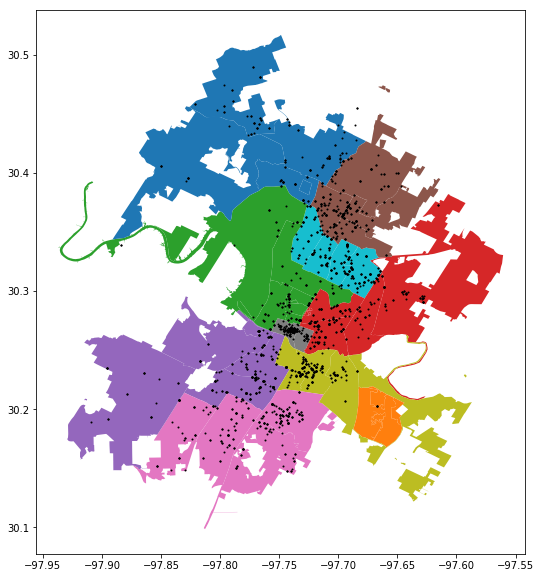

In [22]:
fig1, ax1 = plt.subplots()
shapefile_df_w_prj.plot(ax=ax1, column='SECTOR')
crime_gdf.plot(ax=ax1, marker='.', color='k', markersize=4)
fig1.set_size_inches(10,10)

In [38]:
census_shapefile_df = census_shapefile_df.to_crs(epsg=4326)
census_shapefile_df["GEOID"] = census_shapefile_df["GEOID"].astype(int)

In [39]:
census_shapefile_df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,48,001,950902,1400000US48001950902,48001950902,9509.02,CT,441365958,4947660,"POLYGON ((-95.70501100000001 31.840815, -95.70..."
1,48,005,000200,1400000US48005000200,48005000200,2,CT,125709530,4356605,"POLYGON ((-94.73299300000001 31.385078, -94.73..."
2,48,005,000700,1400000US48005000700,48005000700,7,CT,2876878,0,"POLYGON ((-94.73496999999999 31.327901, -94.73..."
3,48,005,001200,1400000US48005001200,48005001200,12,CT,399114984,98858732,"POLYGON ((-94.52616999999999 31.212772, -94.50..."
4,48,009,020200,1400000US48009020200,48009020200,202,CT,1318291865,40681909,"POLYGON ((-98.95382499999999 33.49637, -98.953..."


In [40]:
# we can choose any one of the ACS folders to join with the census data, we'll go with poverty for illustration
poverty_dir = [directory for directory in os.listdir(acs_dir) if 'poverty' in directory][0]
poverty_dir = os.path.join(acs_dir, poverty_dir)
poverty_csv_name = [csv for csv in os.listdir(poverty_dir) if 'with_ann.csv' in csv][0]
poverty_path = os.path.join(poverty_dir, poverty_csv_name)
poverty_df = pd.read_csv(poverty_path, skiprows=1)
poverty_df = poverty_df.rename(columns={"Id2" : "GEOID"})
census_shapefile_df.describe()

,GEOID,ALAND,AWATER
count,5.254000e+03,5.254000e+03,5.254000e+03
mean,4.822807e+10,1.287861e+08,3.048610e+06
std,1.465129e+08,5.436837e+08,2.602768e+07
min,4.800195e+10,0.000000e+00,0.000000e+00
25%,4.811301e+10,2.397241e+06,0.000000e+00
50%,4.820135e+10,5.010402e+06,1.298200e+04
75%,4.835501e+10,2.647527e+07,3.000630e+05
max,4.850795e+10,1.599486e+10,8.675498e+08


In [42]:
census_merged_df = census_shapefile_df.merge(poverty_df, on = 'GEOID')
print(len(census_merged_df))
print(len(census_shapefile_df))

218
5254


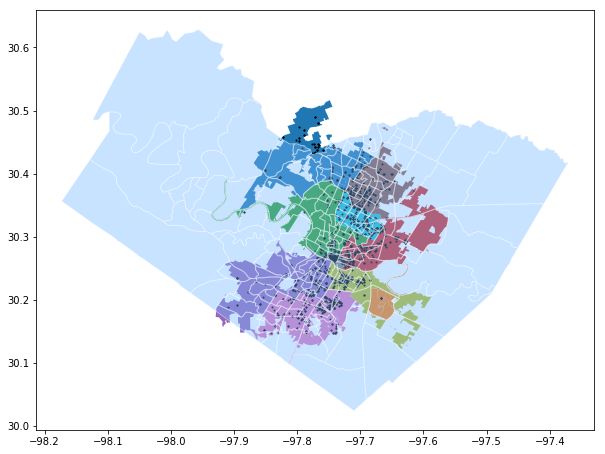

In [44]:
fig2, ax2 = plt.subplots()
shapefile_df_w_prj.plot(ax=ax2, column='SECTOR')
crime_gdf.plot(ax=ax2, marker='.', color='k', markersize=4)
census_merged_df.plot(ax=ax2,color='#74b9ff',alpha=.4,edgecolor='white')
fig2.set_size_inches(10,10)
